<a href="https://colab.research.google.com/github/ShivamGuptadata/TSF-GRIP-TASK-2/blob/main/stock_market_using_LSTM_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LetsGrowMore**
#LGM VIRTUAL INTERNSHIP PROGRAM 2021
##Task-2)Stock Market Prediction And Forecasting Using Stacked LSTM

##**By-SHIVAM KUMAR GUPTA**

##**Table of contents:**
#1.Introduction
#2.Import Required Libraries
#3.Reading and understanding the dataset
         *   Imorting Datasets
         *   Inspecting Dataframes
#4.Data Cleaning and Preparation
        *   Checking Null Values 
        *   Analyze and Drop Irrelevent Variasbles
        *   Normalizing The Data Values
#5.Data Analyze
        *   Splitting the dataset 
        *   Changing the Dimension 
#6.Build the LSTM model
#7.Predictions using the LSTM model
#8.Visualize the predicted stock costs with actual stock costs



##**1.Introduction**
Time series prediction problems are a difficult type of predictive modeling problem.Unlike regression predictive modeling, time series also adds the complexity of a sequence dependence among the input variables.
A powerful type of neural network designed to handle sequence dependence is called recurrent neural networks. The **Long Short-Term Memory network or LSTM **network is a type of recurrent neural network used in deep learning because very large architectures can be successfully trained.
##Problem Description
The problem where we see the future behavior of Stock price. While predicting the actul price of stock is an uphill climb.

##**Import Required Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from numpy import newaxis
import math
from sklearn.metrics import mean_squared_error

##**Read the dataset**

In [2]:
#load the Dataset
link='https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
df=pd.read_csv(link)

In [3]:
print("starting 10 dataset:")
df.head(10)

starting 10 dataset:


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


##**Data Cleaning and Preparation**

In [4]:
print("shape of the dataset:",df.shape)

shape of the dataset: (2035, 8)


In [5]:
print("Complete information of the dataset")
df.info()

Complete information of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [6]:
print("Describe the dataset")
df.describe()

Describe the dataset


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [7]:
print("Checking the Nan values or Null values:")
df.isnull().sum()

Checking the Nan values or Null values:


Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

Plotting the all numerical columns


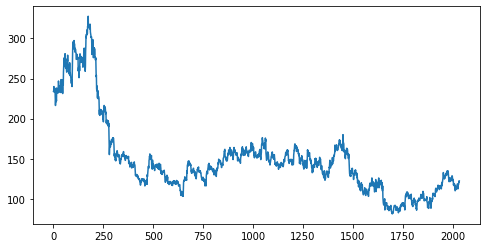

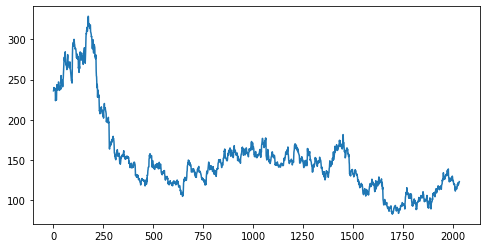

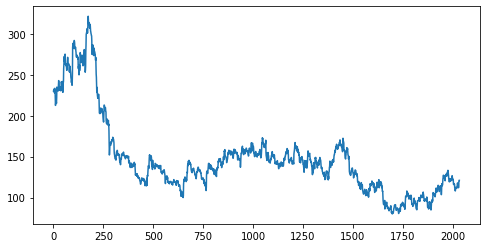

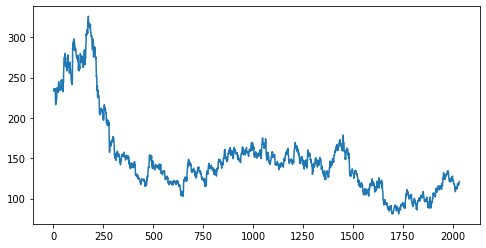

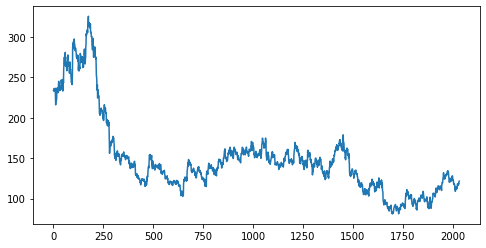

In [8]:
print("Plotting the all numerical columns")
col=['Open','High','Low','Last','Close',]
for i in col:
  plt.figure(figsize=(8,4))
  plt.plot(df[i])

In [9]:
# Change Date obeject variable type to datetime type
df['Date']=pd.to_datetime(df['Date'])
df.dtypes

Date                    datetime64[ns]
Open                           float64
High                           float64
Low                            float64
Last                           float64
Close                          float64
Total Trade Quantity             int64
Turnover (Lacs)                float64
dtype: object

In [10]:
#Sorting the whole dataset
df1=df.sort_index(ascending=False,axis=0)
df1.head(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [11]:
#Reset index in the Stock market data
df2=df1.reset_index()
df2.head(5)

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [12]:
df2.drop(['index'],axis=1)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
1,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
3,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
4,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
2030,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2031,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2032,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2033,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


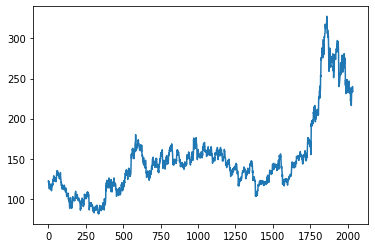

In [13]:
plt.plot(df2['Open'])

In [14]:
df_open=df2['Open']
df_open=pd.DataFrame(df_open)

In [15]:
df_open

,Open
0,122.10
1,120.30
2,121.80
3,120.10
4,117.60
...,...
2030,233.55
2031,233.30
2032,240.00
2033,234.55


In [16]:
print("Min:",np.min(df_open['Open']))
print("Max:",np.max(df_open['Open']))

Min: 81.1
Max: 327.7


In [17]:
#Normalize the dataset
sc=MinMaxScaler(feature_range=(0,1))
df_open=sc.fit_transform(np.array(df_open))

In [18]:
print(df_open.shape)
print(df_open)

(2035, 1)
[[0.16626115]
 [0.15896188]
 [0.16504461]
 ...
 [0.64436334]
 [0.62226277]
 [0.6202352 ]]


##**Data Analyize**

In [19]:
#Splits into train and test sets
train_size = int(len(df_open) * 0.80)
test_size = len(df_open) - train_size
train_data, test_data = df_open[0:train_size,:], df_open[train_size:len(df_open),:]
print(len(train_data), len(test_data))

1628 407


In [20]:
print("Shape of the train data",train_data.shape)
print("Shape of the test data",test_data.shape)

Shape of the train data (1628, 1)
Shape of the test data (407, 1)


In [21]:
# Convert an array of values into a dataset
def build_dataset(data,n_step):
    x,y=[],[]
    for i in range(len(data)):
        last_x=i + n_step
        if last_x > len(data)-1:
            break
        data_x=data[i:last_x,0]
        data_y=data[last_x,0]
        x.append(data_x)
        y.append(data_y)
    return np.array(x), np.array(y)

In [22]:
n_step=100
x_train,y_train=build_dataset(train_data,n_step)
x_test,y_test=build_dataset(test_data,n_step)

In [23]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1528, 100)
(1528,)
(307, 100)
(307,)


In [24]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

**Build the LSTM model**

In [25]:
# define model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
#Fit the model
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
24/24 [==============================] - 10s 218ms/step - loss: 0.0062 - val_loss: 0.0220
Epoch 2/100
24/24 [==============================] - 4s 163ms/step - loss: 0.0012 - val_loss: 0.0051
Epoch 3/100
24/24 [==============================] - 4s 166ms/step - loss: 8.6309e-04 - val_loss: 0.0063
Epoch 4/100
24/24 [==============================] - 4s 170ms/step - loss: 8.2257e-04 - val_loss: 0.0048
Epoch 5/100
24/24 [==============================] - 4s 167ms/step - loss: 7.6661e-04 - val_loss: 0.0056
Epoch 6/100
24/24 [==============================] - 4s 168ms/step - loss: 7.3666e-04 - val_loss: 0.0060
Epoch 7/100
24/24 [==============================] - 4s 166ms/step - loss: 6.9498e-04 - val_loss: 0.0061
Epoch 8/100
24/24 [==============================] - 4s 166ms/step - loss: 6.6012e-04 - val_loss: 0.0054
Epoch 9/100
24/24 [==============================] - 4s 167ms/step - loss: 6.2767e-04 - val_loss: 0.0089
Epoch 10/100
24/24 [==============================] - 4s 164ms

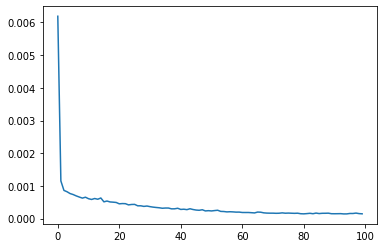

In [28]:
#plotting the loss variable in this model
loss_per_epoch=model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

**Predictions using the LSTM model**

In [29]:
#Predict the model
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [30]:
#Inverse prediction
train_predict=sc.inverse_transform(train_predict)
test_predict=sc.inverse_transform(test_predict)

In [31]:
# Calculate the mean squared error
mse_train=math.sqrt(mean_squared_error(y_train,train_predict))
print("MSE of train data:",mse_train)
mse_test=math.sqrt(mean_squared_error(y_test,test_predict))
print("MSE of test data",mse_test)

MSE of train data: 132.4128520389
MSE of test data 240.5647178477599


In [32]:
#Predict lenght consecutive values from a real one
def predict_sequences(model, startvalue, length):
    prediction_seqs = []
    observed_val = startvalue
    
    for i in range(length): 
        predicted = []        
        pre_y=model.predict(observed_val[newaxis,:,:])
        predicted.append(pre_y[0,0])
        observed_val = observed_val[0:]
        observed_val = np.insert(observed_val[0:], i+1, predicted[-1], axis=0)
        prediction_seqs.append(predicted[-1])
        
    return prediction_seqs


**Visualize the predicted stock costs with actual stock costs**


In [33]:
def stock_plot_results(predicted_data, real_data,length):
    plt.figure(figsize=(20,10))
    plt.plot(sc.inverse_transform(real_data.reshape(-1, 1))[length:])
    plt.plot(sc.inverse_transform(np.array(predicted_data).reshape(-1, 1))[length:])
    plt.show()

In [34]:
predict_length=5
predictions = predict_sequences(model, x_test[0], predict_length)

[[150.50206]
 [150.50206]
 [150.50206]
 [150.50206]
 [150.50206]]


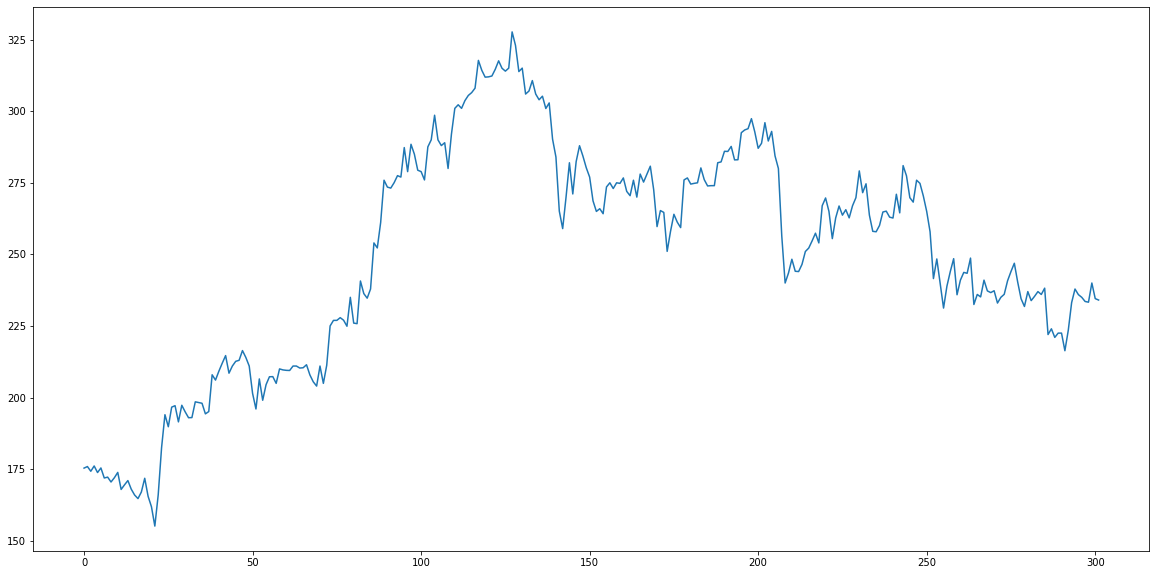

In [35]:
print(sc.inverse_transform(np.array(predictions).reshape(-1, 1)))
stock_plot_results(predictions, y_test, predict_length)

## Predicted the next 100 dayes

In [36]:
predata=test_data[307:]
predata=predata.reshape(1,-1)
shortdata=list(predata)
shortdata=shortdata[0].tolist()

In [38]:
def predict_output(inputs,next_data):
  pred_otput=[];
  n_step=100
  i=0
  while(i<30):
      if len(next_data)>100:
          inputs=np.array(next_data[1:])
          inputs=inputs.reshape(1,-1)
          inputs=inputs.reshape((1,n_step,1))
          obs_y=model.predict(inputs)
          next_data.extend(obs_y[0].tolist())
          next_data=next_data[1:]
          pred_otput.extend(obs_y.tolist())
          i=i+1
      else:
          inputs=inputs.reshape(1,n_step,1)
          obs_y=model.predict(inputs)
          next_data.extend(obs_y[0].tolist())
          pred_otput.extend(obs_y.tolist())
          i=i+1
  return pred_otput

In [39]:
final_output=predict_output(predata,shortdata)

In [40]:
new_day=np.arange(1,101)
pre_day=np.arange(101,131)
n_df=df_open.tolist()
n_df.extend(final_output)

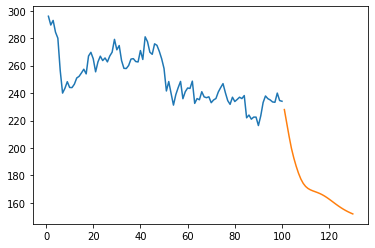

In [42]:
plt.plot(new_day,sc.inverse_transform(df_open[1935:]))
plt.plot(pre_day,sc.inverse_transform(final_output))